# Homework 7: Confidence Intervals, the Normal Distribution, and the Central Limit Theorem

## Due Tuesday, November 22nd at 11:59PM

Welcome to Homework 7! This week, we will cover confidence intervals, the normal distribution, and the Central Limit Theorem. You can find additional help on these topics in the following readings:

* [CIT 13.3](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html): Confidence Intervals
* [CIT 13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html): Using Confidence Intervals
* [CIT 14.2](https://www.inferentialthinking.com/chapters/14/2/Variability.html): Variability, Standard Deviation, Standard Units, Chebyshev's Bounds
* [CIT 14.3](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html): The Standard Deviation (SD) and the Normal Curve 
* [CIT 14.4](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html): The Central Limit Theorem
* [CIT 14.5](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html): The Variability of the Sample Mean
* [CIT 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html): Choosing a Sample Size

### Instructions

This assignment is due Tuesday, November 22nd at 11:59PM. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or EdStem. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

In [1]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

from IPython.display import IFrame
def show_clt_slides():
    src = "https://docs.google.com/presentation/d/e/2PACX-1vTcJd3U1H1KoXqBFcWGKFUPjZbeW4oiNZZLCFY8jqvSDsl4L1rRTg7980nPs1TGCAecYKUZxH5MZIBh/embed?start=false&loop=false&delayms=3000"
    width = 700
    height = 370
    display(IFrame(src, width, height))

## 1. Comparing Video Game Sales 🎮
Suppose you’re a big video game fan, and you’re bored of playing all the games you have, so it’s time for a change.
You and your friends agree to only play one video game genre for the next few weeks, but are unsure of which genre to choose. Luckily, you have a data set on [video game sales](https://www.kaggle.com/datasets/gregorut/videogamesales), which includes data on the games’ genres. You’re interested in seeing which genres have the highest sales since these are probably the genres that are more popular.

The DataFrame below corresponds to a **sample** of video games. Each row corresponds to a particular video game. We have information on the `'Name'` of the game, the `'Platform'` it's played on, the `'Genre'`, the `'Publisher'`, and the `'Sales'` in millions of dollars. Now it’s time to analyze the popularity for each genre of video game!

In [2]:
vg_sales = bpd.read_csv('data/vgsales.csv')
vg_sales 

,Name,Platform,Genre,Publisher,Sales
0,Wii Sports,Wii,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.01
16596,Know How 2,DS,Puzzle,7G//AMES,0.01


**Question 1.1.** Let's start by determining the mean sales for each genre. Create a DataFrame called `genre_means`, indexed by `'Genre'`, with a `'Sales'` column that contains the mean sales for each genre, in millions of dollars. Sort the genres in descending order of `'Sales'`.

In [3]:
genre_means = vg_sales.groupby('Genre').mean().sort_values('Sales')
genre_means

,Sales
Genre,
Adventure,0.185879
Strategy,0.257151
Puzzle,0.420876
Simulation,0.452364
Misc,0.465762
...,...
Sports,0.567319
Racing,0.586101
Role-Playing,0.623233


In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** The `'Platform'` genre (not to be confused with the `'Platform'` column!) seems to have a pretty high mean sales figure based on the data we have access to. However the data we have access to is only a sample of all video games ever created, and thus the mean sales figure for the `'Platform'` genre computed above is only a sample statistic, not a population parameter.

Produce 1,000 bootstrapped estimates for the mean sales of all games in the genre `'Platform'`, in millions of dollars. Store the estimates in the `platform_averages` array. Then, use the `platform_averages` array to calculate an approximate 99% confidence interval for the true mean sales, in millions of dollars. Assign the endpoints of your interval to `lower_bound` and `upper_bound`. 

'A 99% confidence interval for average sales of Platform video games is [1.1636391647855533, 0.7409616252821657]'

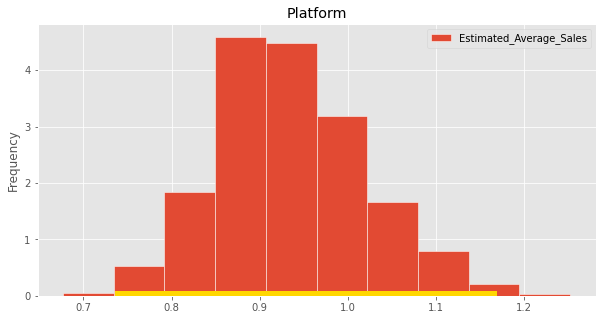

In [5]:
platform_averages = np.array([])

for i in range(1000):
    only_platform = vg_sales[vg_sales.get('Genre') == 'Platform']
    resample = only_platform.sample(only_platform.shape[0], replace=True)
    resample_mean = resample.get('Sales').mean()
    platform_averages = np.append(platform_averages, resample_mean)

lower_bound = np.percentile(platform_averages, 99.5)
upper_bound = np.percentile(platform_averages, 0.5)

# Display the estimates in a histogram.
bpd.DataFrame().assign(Estimated_Average_Sales=platform_averages).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title="Platform");
plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval');

# Don't change the line below (though you will need to copy and change it in 1.3)
genre_name = 'Platform'
f'A 99% confidence interval for average sales of {genre_name} video games is [{lower_bound}, {upper_bound}]'

In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** You want to create a similar histogram for each of the other genres, and also calculate the corresponding confidence intervals, but repeating the process above 11 times would be time-consuming. 

Create a function called `ci_and_hist`, which takes in a video game genre as a string, and:
1. **Plots the histogram** of 1,000 bootstrapped estimates for the genre's mean sales.
2. **Returns** a string describing the approximate 99% confidence interval for the genre's mean sales, formatted in the same way as the string displayed for `'Platform'` in Question 1.2. 

Start with the code from 1.2 and generalize it to work for any genre.

*Notes*: 
- Make sure your function both plots a histogram and **returns** a string. For example, `ci_and_hist('Racing')` should return a string that starts with `'A 99% confidence interval for average sales of Racing video games is'`.
- The string displayed at the end of 1.2 was created using a feature of Python called f-strings. You'll need to copy and change that f-string expression. Read [this article](https://realpython.com/python-f-strings/#simple-syntax) for more details about f-strings.

A 99% confidence interval for average sales of Fighting video games is [0.6128738207547156, 0.4605295400943399]
A 99% confidence interval for average sales of Racing video games is [0.6992174939951937, 0.47868686949559547]
A 99% confidence interval for average sales of Platform video games is [1.170368735891645, 0.7278825056433398]


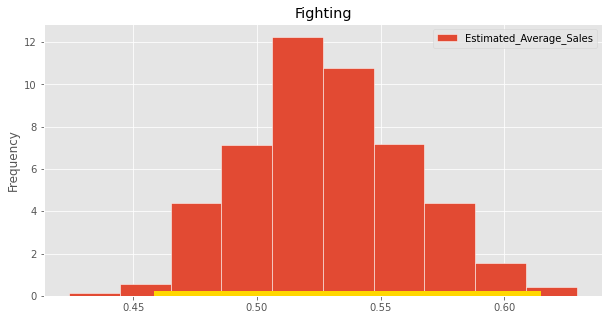

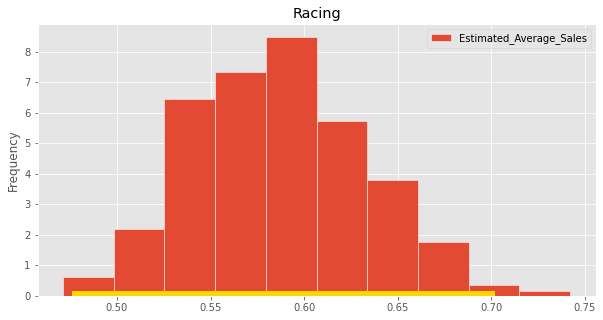

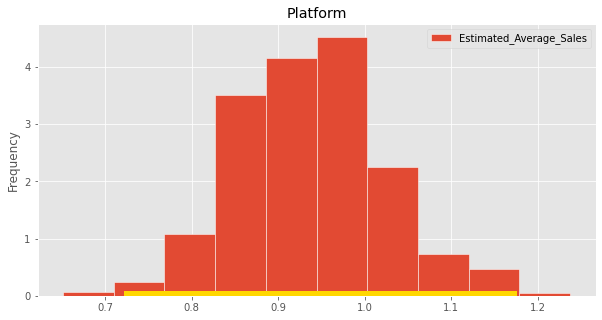

In [7]:
def ci_and_hist(genre_name):
    platform_averages = np.array([])

    for i in range(1000):
        only_platform = vg_sales[vg_sales.get('Genre') == genre_name]
        resample = only_platform.sample(only_platform.shape[0], replace=True)
        resample_mean = resample.get('Sales').mean()
        platform_averages = np.append(platform_averages, resample_mean)

    lower_bound = np.percentile(platform_averages, 99.5)
    upper_bound = np.percentile(platform_averages, 0.5)
    
    # Display the estimates in a histogram.
    bpd.DataFrame().assign(Estimated_Average_Sales=platform_averages).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title=genre_name);
    plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval');
    
    #Display f string
    return f'A 99% confidence interval for average sales of {genre_name} video games is [{lower_bound}, {upper_bound}]'

# Example calls to the function. Don't change the lines below.
fighting_string = ci_and_hist('Fighting')
print(fighting_string)
racing_string = ci_and_hist('Racing')
print(racing_string)
platform_string = ci_and_hist('Platform')
print(platform_string)

In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Your friend claims that games of the `'Strategy'` genre are actually more popular than the data depicts. In our sample, the mean sales for the `'Strategy'` genre is about 0.26 million. She claims that since our sales data is only a sample of the full population of games, the actual mean sales for the `'Strategy'` genre could be 0.36 million. You decide to perform a hypothesis test for the following pair of hypotheses:

- **Null Hypothesis**: The mean sales for the `'Strategy'` genre is 0.36 million.
- **Alternative Hypothesis**: The mean sales for the `'Strategy'` genre is not 0.36 million.

Run the cell below to use the `ci_and_hist` function you defined above to calculate an approximate 99% confidence interval for the mean sales of the `'Strategy'` genre. 

'A 99% confidence interval for average sales of Strategy video games is [0.3107344346549192, 0.20879441997063136]'

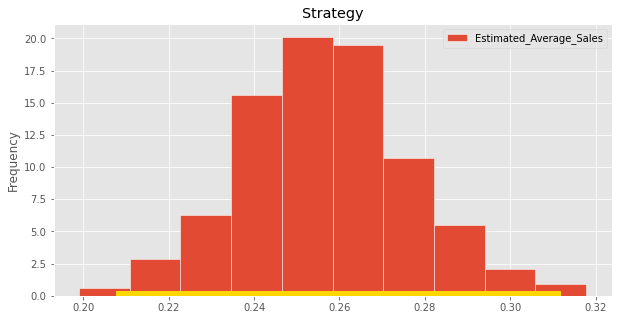

In [9]:
ci_and_hist('Strategy') 

Do you reject the null hypothesis at a 0.01 p-value cutoff? Assign 1, 2, 3, or 4 to `q1_4`.
1. No, because the confidence interval includes 0.36.
2. No, because the confidence interval doesn't include 0.36.
3. Yes, because the confidence interval includes 0.36.
4. Yes, because the confidence interval doesn't include 0.36.

In [10]:
q1_4 = 4

In [11]:
grader.check("q1_4")

q1_4 results: All test cases passed!

## 2. Testing the Central Limit Theorem: Coin Flips and Midterm Scores 💯


The Central Limit Theorem tells us that the probability distribution of the sum or mean of a large random sample drawn with replacement is roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that, if we're using the mean as our statistic, the standard deviation of this normal distribution is given by $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

 In other words, suppose we start with *any distribution* that has standard deviation $\sigma$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{\sigma}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but we've seen examples in lecture of this formula in action, such as when we looked at flight delay data.

Run the cell below to see a short presentation that describes the CLT at a high level.

In [12]:
show_clt_slides()

In this exercise, we will be exploring some data to see the CLT in action.

**Question 2.1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as the sample size increases.

Consider a coin flip. If we say heads is $1$ and tails is $0$, then there's a 50% chance of getting a $1$ and a 50% chance of getting a $0$, which is definitely not a normal distribution.  The mean of these $1$s and $0$s for several coin tosses is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size `n`. It should repeat, 5000 times, the process of:
- simulating `n` flips of a fair coin, and
- counting the proportion of flips that were heads.

`simulate_sample_n` should return an array that contains 5000 sample proportions, using the process outlined above.

In [13]:
def simulate_sample_n(n):
    simulation_results = np.array([])
    for i in range(5000):
        coin_flips = np.random.multinomial(n, [0.5, 0.5])
        prop_heads = coin_flips[0]/n
        simulation_results = np.append(simulation_results, prop_heads)
    return simulation_results
    
simulate_sample_n(5)

array([0.4, 0.2, 0.8, ..., 0.6, 0.4, 0. ])

In [14]:
grader.check("q2_1")

q2_1 results: All test cases passed!

The code below will use the function you just defined to plot the empirical distribution of the sample mean for several different sample sizes. We saw something similar in [Lecture 22](https://dsc10.com/resources/lectures/lec22/lec22.html).

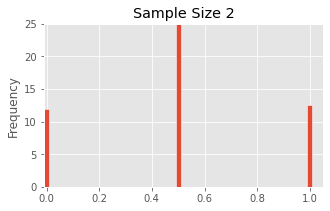

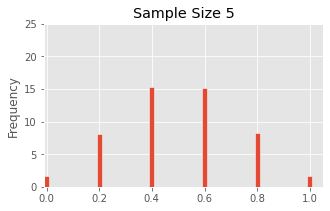

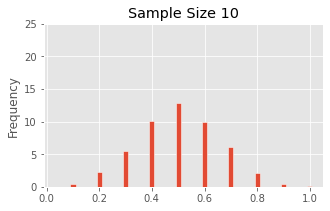

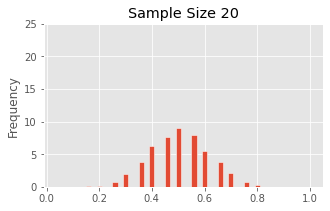

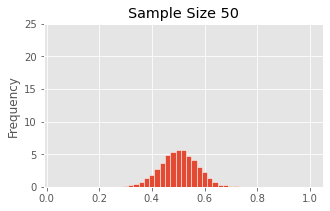

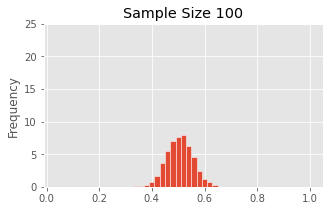

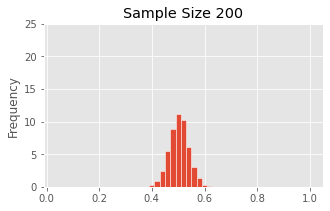

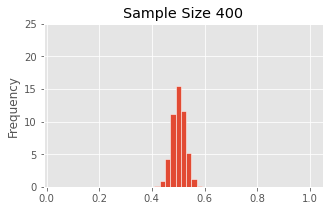

In [15]:
bins = np.arange(-0.01, 1.05, 0.02)

for sample_size in np.array([2, 5, 10, 20, 50, 100, 200, 400]):
    bpd.DataFrame().assign(**{'Sample_Size:{}'.format(sample_size) : simulate_sample_n(sample_size)}) \
                   .plot(kind='hist', density=True, ec='w', bins=bins, 
                         title=f'Sample Size {sample_size}', legend=None, figsize=(5, 3));
    plt.xlim(-0.01, 1.05)
    plt.ylim(0, 25);

You can see that even for samples of size 10, the distribution of sample proportions looks roughly bell-shaped. When we increase the sample size to 50, the resulting distribution looks quite bell-shaped. Note also that as the sample sizes increases, the distributions of sample proportions become narrower.

Now we will test the second claim of the CLT: that the SD of the distribution of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

$$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

Below, we will read in the scores of this quarter's Midterm Exam (which we have modified slightly for anonymity). We'll treat this DataFrame as our population, and we'll take samples directly from it. We've computed the standard deviation of the midterm scores for you; you will need to use it in the next question.

In [16]:
midterm = bpd.read_csv('data/fa22-midterm-scores.csv')
midterm

,Section,Score
0,A,54.5
1,D,62.0
2,B,23.5
3,B,44.5
4,C,40.5
...,...,...
388,B,20.5
389,B,41.0
390,C,62.5
391,B,47.5


In [17]:
midterm_std = np.std(midterm.get('Score'))
midterm_std

14.642496347033834

**Question 2.2.** Write a function called `predict_sd` that takes in a sample size `n`. It returns the predicted standard deviation (according to the CLT) of the sample mean's distribution, for samples of size `n` taken from the midterm data.

*Hint*: **Do not** use `simulate_sample_n`.

In [18]:
def predict_sd(n):
    resample = midterm.sample(n, replace=True)
    return np.std(resample.get('Score'))/(resample.shape[0]**0.5)

predict_sd(10)

4.247822971829216

In [19]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Write a function called `empirical_sd` that takes in a sample size `n`, draws 1,000 samples of size `n` from the midterm scores data set with replacement, and returns the **standard deviation of the distribution of the sample means** of those 1,000 samples.

*Hint*: This function will be similar to the `simulate_sample_n` function you wrote earlier.

In [20]:
def empirical_sd(n): 
    sample_means = np.array([])
    for i in range(1000):
        resample = midterm.sample(n)
        resample_mean = resample.get('Score').mean()
        sample_means = np.append(sample_means, resample_mean)
    return np.std(sample_means)

empirical_sd(10)

4.429224508872857

In [21]:
grader.check("q2_3")

q2_3 results: All test cases passed!

The cell below will plot the predicted SDs (computed by your `predict_sd` function) and empirical SDs (computed by your `empirical_sd` function) for various sample sizes. It may take a few moments to run.

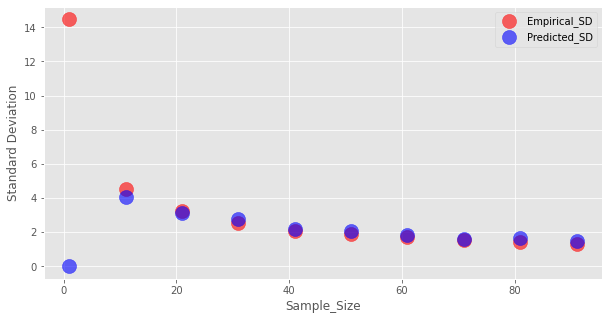

In [22]:
sd_df = bpd.DataFrame().assign(Sample_Size = np.arange(1, 101, 10))
predicted = sd_df.get('Sample_Size').apply(predict_sd)
empirical = sd_df.get('Sample_Size').apply(empirical_sd)
sd_df = sd_df.assign(Predicted_SD = predicted, Empirical_SD = empirical)
ax = sd_df.plot(kind='scatter',x='Sample_Size', y='Empirical_SD',label='Empirical_SD', color='red', alpha=0.6, s=200, figsize=(10, 5));
ax = sd_df.plot(kind='scatter',x='Sample_Size', y='Predicted_SD',label='Predicted_SD', color='blue', alpha=0.6, s=200, ax=ax)
ax.set_ylabel('Standard Deviation');

It appears that the formula $\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$ matches what we see in practice!

## 3. UCSD's Housing Crisis 🏠

In April 2021, UCSD's Housing Dining Hospitality (HDH) removed triple occupancy dorm rooms and eliminated its two-year housing guarantee. With [enrollments rising](https://blink.ucsd.edu/instructors/courses/enrollment/week3.html) to a record-breaking 42,875 in Fall 2021 (and even higher in Fall 2022), this led to a [housing crisis](https://triton.news/2021/10/ucsd-students-face-housing-crisis-as-enrollment-rises/) in which many students struggled to secure housing for the 2021-22 school year. In response, UCSD
- directed students to an off-campus housing website,
- hosted an off-campus housing webinar, and
- offered an option for students to live in local hotels at a discounted rate.

A data scientist at UCSD wanted to see if students were actually satisfied with the solutions UCSD provided. She polled a uniform random sample of all UCSD students, and determined that 210 of the 700 sampled students thought UCSD's solutions were satisfactory.

In [23]:
# Run this cell, but don't change it.
survey = bpd.DataFrame().assign(
    Opinion=np.array(["Satisfactory", "Unsatisfactory"]),
    Count=np.array([210,   490]))
sample_size = survey.get("Count").sum()
survey_results = survey.assign(
    Proportion=survey.get("Count") / sample_size)
survey_results

,Opinion,Count,Proportion
0,Satisfactory,210,0.3
1,Unsatisfactory,490,0.7


Next, she used 1,000 bootstrap resamples to compute a confidence interval for the proportion of all UCSD students who found the solutions satisfactory.  Run the next cell to see the empirical distribution of `'Satisfactory'` proportions in the 1,000 resamples.

Note that we're using `np.random.multinomial` to do the resampling here, since each element of the resample is either 1 (satisfactory) or 0 (unsatisfactory) with known probabilities. This accomplishes the same thing as using `.sample` with `replace=True`, but is much faster.

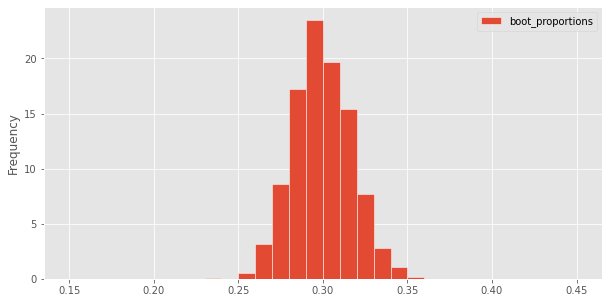

In [24]:
boot_proportions = np.array([])
for i in np.arange(1000):
    resample = np.random.multinomial(sample_size, survey_results.get('Proportion')) / sample_size
    boot_proportions = np.append(boot_proportions, resample[0])
bpd.DataFrame().assign(boot_proportions = boot_proportions).plot(kind='hist', density=True, ec='w', bins=np.arange(0.15, 0.45, .01), figsize=(10,5));

Recall, the Central Limit Theorem says

$$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

Furthermore, in any collection of numbers where the only unique values are 0 and 1, there is a simple formula for the standard deviation of the collection:

$$\text{SD of Collection of 0s and 1s} = \sqrt{(\text{Proportion of 0s in Collection}) \times (\text{Proportion of 1s in Collection})}$$

Note that samples and populations are both possible examples of "collections." 

(You're not responsible for deriving this formula, but if you're curious, it's possible to do so just by using the definition of standard deviation and a little algebra!)

**Question 3.1.**
**Without accessing the data in `boot_proportions` in any way**, compute an approximation of the standard deviation of the array `boot_proportions` and assign it to the variable `approximate_sd`.

Instead of using `boot_proportions` directly, use **both** the Central Limit Theorem and the standard deviation formula above. Since you don't know the true proportions of 0s and 1s in the population, use the proportions in the sample instead (since they're likely to be similar).

In [25]:
total = survey.get('Count').sum()
prop_zero = survey.get('Count').loc[1] / total
prop_one = survey.get('Count').loc[0] / total
approximate_sd = ((prop_zero * prop_one)**0.5) / (total**0.5)
approximate_sd

0.017320508075688773

In [26]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Compute the actual standard deviation of the array `boot_proportions`. Your answer should be close to your answer from 3.1.

In [27]:
exact_sd = np.std(boot_proportions)
exact_sd

0.017177996366971135

In [28]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.**
**Still without accessing `boot_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of students that found UCSD's solutions satisfactory. The cell below `grader.check("q3_3")` draws your interval in gold below the histogram of `boot_proportions`; use that to verify that your answer looks right.

*Hint*: In the past, we've used `np.percentile` on the array of bootstrapped estimates to find the bounds for the confidence interval. Now, **we're not allowed to use the bootstrapped distribution**, so we can't do it that way. But we don't need to! The Central Limit Theorem tells us that the distribution of the sample mean is normal with a certain standard deviation. We also know that 95% of the area of the normal distribution falls within a certain number of standard deviations from the mean.

In [29]:
lower_limit = prop_one - 2 * approximate_sd
upper_limit = prop_one + 2 * approximate_sd

# Your interval is:
[lower_limit, upper_limit]

[0.26535898384862244, 0.33464101615137753]

In [30]:
grader.check("q3_3")

q3_3 results: All test cases passed!

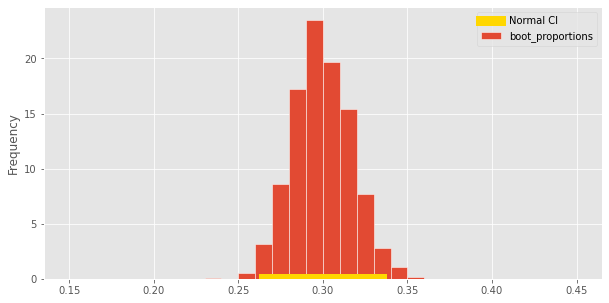

In [31]:
# Run this cell to plot your confidence interval.
bpd.DataFrame().assign(boot_proportions = boot_proportions).plot(kind='hist', density=True, ec='w', bins=np.arange(0.15, 0.45, 0.01), figsize=(10, 5));
plt.plot([upper_limit, lower_limit], [0, 0], color='gold', linewidth=10, label='Normal CI');
plt.legend();

Your confidence interval should make it clear that we're pretty confident that relatively few students were satisfied by UCSD's solutions. This makes sense, as the proportion of `'Satisfactory'` opinions in the sample was only 0.30. 

The data scientist is considering redoing the survey with a larger sample to estimate the population proportion of `'Satisfactory'` opinions with greater precision. She would be happy if the **standard deviation of the distribution of the sample mean were 0.006** (or less).  She'll need to take a new sample that's large enough to achieve that. Polling is time-consuming, so the sample also shouldn't be bigger than necessary.

Instead of making the conservative assumption that the population standard deviation is 0.5 (the largest possible SD of a collection of 0s and 1s), she decides to assume that it's equal to the standard deviation of her first sample. That is,

$$\text{Population SD} \approx \text{Sample SD} = \sqrt{(\text{Proportion of 0s in Sample}) \times (\text{Proportion of 1s in Sample})}$$

Under that assumption, she computes the smallest sample size necessary in order to be confident that the standard deviation of the distribution of the sample mean is at most 0.006.

**Question 3.4.**
What sample size did she find? Assign your answer to the variable `new_sample_size`, which should be of type `int`.

Use the fact that $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

*Hints*:
- There is only one unknown in the equation above.
- Think about how you should round your answer to satisfy the constraints of the problem.

In [32]:
sample_sd = ((prop_zero * prop_one)**0.5)
new_sample_size = int(np.ceil((sample_sd / 0.006)**2))
new_sample_size

5834

In [33]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** Suppose the data scientist wants to be even more precise and take a sample of sufficient size such that the standard deviation of the sample mean distribution is 0.0015. Is it possible for her to do this? Choose the best answer and explanation, then assign `q3_5` to either 1, 2, 3, or 4.
1. Yes. She can repeat the sample again until she comes across a sample with a standard deviation of 0.0015.
2. Yes. Since the 0.0015 is a quarter of 0.006, the required sample size is a fourth of `new_sample_size`.
3. Yes. Since the 0.0015 is a quarter of 0.006, the required sample size is four times `new_sample_size`.
3. No, the sample size required to reach that sample mean standard deviation is larger than the number of students at UCSD.

In [34]:
q3_5 = 4

In [35]:
grader.check("q3_5")

q3_5 results: All test cases passed!

By the way, UCSD eventually decided to partially reverse some of the decisions that led to the housing crisis. Now, in the 2022-23 school year, some [triple-occupancy dorm rooms are again being used to house three students](https://triton.news/2022/03/uc-san-diego-to-bring-back-triple-dorm-occupancy/#:~:text=In%20Spring%20Quarter%202021%2C%20UCSD's,net%20loss%20of%20housing%20capacity.). UCSD even brought back the [two-year housing guarantee](https://www.sandiegouniontribune.com/news/education/story/2022-08-29/ucsd-housing-undergraduates)!

## 4. Key Concepts 🔑

**Question 4.1.** How do we convert the value 116 to standard units if it comes from a data set where the mean is 133 and the standard deviation is 14? Assign `q4_1` to either 1, 2, 3, or 4.

1.
$\dfrac{({133-116})^2}{14}$

2.
$\dfrac{116-133}{14}$

3.
$\dfrac{133-116}{14}$

4.
$\dfrac{{116-133}}{\sqrt{14}}$

In [36]:
q4_1 = 2

In [37]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** According to Chebyshev's inequality, for any data set, at least one quarter the data falls within how many standard deviations of the mean? Assign the **smallest** correct answer to `q4_2`.

1. 1.00
2. 1.16
3. 1.28
4. 1.50

In [38]:
q4_2 = 2

In [39]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Assign `q4_3` to a **list** of all statements below that are **always** true.

1. If we know the mean and SD of a distribution, we can calculate a 95% confidence interval by stepping out two standard deviations from the mean in either direction.
2. An empirical histogram of the sample median of a large random sample drawn with replacement from a population will be roughly normal.
3. An empirical histogram of the sample mean of a large random sample drawn with replacement from a population will be roughly normal.
4. For any distribution, at least 68% of the data falls within two standard deviations of the mean.
5. For any distribution, 68% of the data falls within one standard deviation of the mean.

In [40]:
q4_3 = [3, 4]

In [41]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Consider drawing a large random sample with replacement from some population. Let $x$ be the sample size such that the standard deviation of the distribution of sample means is 0.04. What sample size is required to guarantee that the standard deviation of the distribution of sample means is no more than 0.01? Assign `q4_4` to either 1, 2, 3, or 4.

1. $2x$
2. $4x$
3. $8x$
4. $16x$

In [42]:
q4_4 = 4
q4_4

4

In [43]:
grader.check("q4_4")

q4_4 results: All test cases passed!

## Finish Line 🏁

Congratulations! You are done with Homework 7 – the final homework of the quarter! 🎉

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [44]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!